In [32]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
trans_dataset_list = ['0']
models = ['rtdetr-l-coco-torch', 'yolov8m-world-torch']
results = {}

for t in trans_dataset_list:
    results[t] = {}
    for model in models:
        with open(f'evaluation/transdata_{t}_n25_{model}_results.json', 'r') as f:
            results[t][model] = json.load(f)
        

In [18]:
results['0']['rtdetr-l-coco-torch'].keys()

dict_keys(['og_dataset', 'trans_dataset', 'model_name', 'affected_dict', 'affected_perc', 'threshold_list', 'affected_scores', 'og_metrics', 'trans_metrics', 'overall_og_mean_metrics', 'overall_trans_mean_metrics', 'trans_obj_metrics', 'overall_obj_metrics', 'matching_scores', 'overall_mean_matching_score', 'overall_mean_affected_matching_score'])

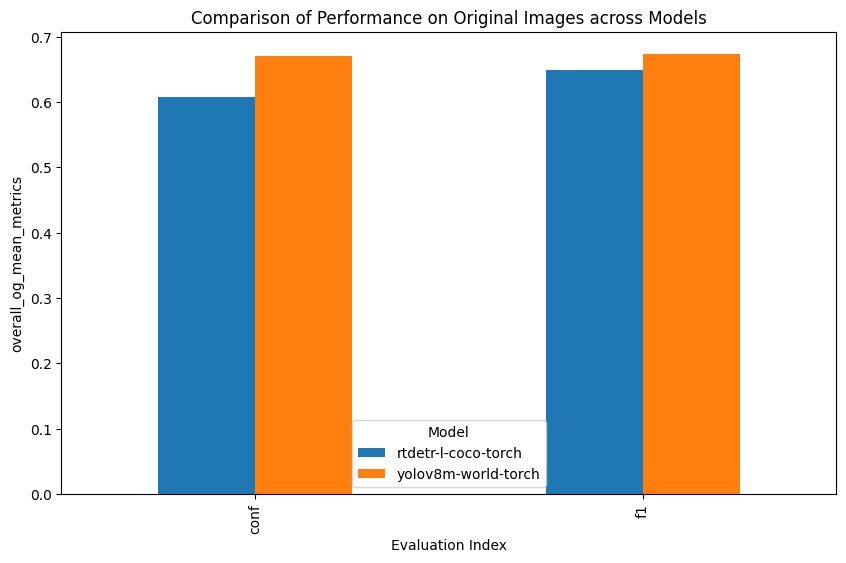

In [ ]:
def plot_bar(metric_name, overlap_result):
    data = {}
    for model in overlap_result:
        data[model] = {}
        for additional_metric in overlap_result[model][metric_name]:
            data[model][additional_metric] = overlap_result[model][metric_name]
            data[model][additional_metric] = overlap_result[model][metric_name][additional_metric]

    # Convert the data dictionary to a DataFrame for easier plotting
    df = pd.DataFrame(data)

    # Create the bar plot
    df.plot(kind='bar', figsize=(10, 6))

    # Customize the plot
    plt.xlabel('Evaluation Index')
    plt.ylabel(metric_name)
    plt.title(f'Comparison of Performance on Original Images across Models')
    plt.legend(title='Model')
    
    # Show the plot
    plt.show()
    return df

df_og_perf = plot_bar('overall_og_mean_metrics', results['0'], )

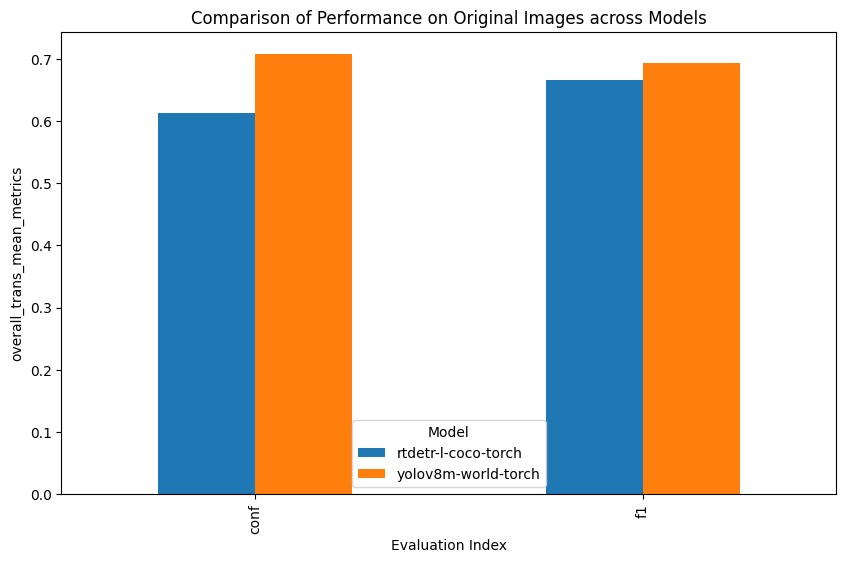

In [42]:
trans_og_perf = plot_bar('overall_trans_mean_metrics', results['0'], )